In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Volatility prediction in financial markets 
par CFM 

Use past volatilities and price changes of financial instruments to predict future volatility and control the risk of financial portfolios

The input files contain volatility and return direction of a given set of stocks and dates aggregated over five minute periods. Each line is defined by a unique 'ID' and is related to a given day (defined by a 'date') and a given stock (defined by a 'product_id'). Volatilities are standard deviations of stock prices over five-minute period and are time-stamped (from 9:30am to 1:55pm) by the start time of their computation period, yielding 54 volatility samples for each ‘ID’. Return directions are the sign of the price change during a five-minute period. Like volatility data, they are time-stamped (from 9:30am to 1:55pm) by the start time of their computation period. Hence, for each ‘ID’, the input files provide 54 return direction values. The first line of this input file is the header, and columns are separated by semicolons. The three first columns correspond respectively to: - the 'ID': identification number of the line, it is linked to the forecast IDs provided in the output file - the 'date': related to a specific day, it is shared between several stocks (for practical reasons, days have been randomized), - and the 'product_id': identification number of the stock, it is related to a specific company (the stock #236 corresponds to the same company in the training and testing files) The following columns correspond to volatility over 5-min periods, and then to return direction over 5-min periods. Time stamps are given in military format. For instance, a volatility time-stamped by 10:00:00 is the volatility measured between 10:00am and 10:05am. Here is an example of an input file: ID;date;product_id;volatility 09:30:00;volatility 09:35:00;...;volatility 13:55:00;return 09:30:00;…;return 13:55:00 1;1;1;0.6627;0.7168;...;0.0523;-1;...;-1 2;1;2;0.2853;0. 3795;...;0.0711,1;...;-1 3;1;3;1.1516;1.0935;...;0.1179;-1;...;1 The training output file contains the target for each 'ID', where the target is the volatility of the same set of stocks and dates measured between 2:00pm and 4:00pm. The first line of this file is the header and columns are separated by semicolons. The columns correspond respectively to the identification number of the line and the value of the actual volatility for this specific line as shown in the following sample: ID;TARGET 1;0.1341 2;0.0461 3;0.1443 4;0.1301 Using the testing_input file, challengers must provide a testing output file in the same format as the training output file (associating with each ID number, the predicted volatility for the 2:00pm - 4:00pm period of time). Submissions can take up to ten minutes due to the size of the testing output file. Last but not least, the metric used in this challenge to designate the winning participant will be the mean absolute percentage error (MAPE)[https://en.wikipedia.org/wiki/Mean_absolute_percentage_error].

Summary:

    - ID : indexes lines
    - date : randomized dates (2093 days)
    - product_id : identification number of the stock (318 stocks)
    - volatility : volatility over 5-min periods. Ex : a volatility time-stamped by 10:00:00 is the volatility measured between 10:00am and 10:05am
    - return : sign of the price change during a five-minute period (-1, 0, 1)
    - target : volatility of the same set of stocks and dates measured between 2:00pm and 4:00pm 
    => Moyenne ? difference entre 14 et 16h? ...

Realized volatility helps us gauge how much an asset’s price moved in the past by considering the historical returns. It is a fundamental metric for assessing the accuracy of volatility prediction models and is essential for making informed financial decisions in a world characterized by uncertainty and market fluctuations.
Ici on le suppose ?

In [2]:
# Data import

y_train = pd.read_csv('y_train.csv', sep=",")
x_train = pd.read_csv('x_train.csv', sep=";")
x_test = pd.read_csv('x_test.csv', sep=";")

In [3]:
x_train

,ID,date,product_id,volatility 09:30:00,volatility 09:35:00,volatility 09:40:00,volatility 09:45:00,volatility 09:50:00,volatility 09:55:00,volatility 10:00:00,...,return 13:10:00,return 13:15:00,return 13:20:00,return 13:25:00,return 13:30:00,return 13:35:00,return 13:40:00,return 13:45:00,return 13:50:00,return 13:55:00
0,1,1,1,0.662737,0.716896,0.698601,0.480172,0.623665,0.201876,0.327206,...,1.0,1.0,1.0,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0
1,2,1,2,0.285394,0.379560,0.094858,0.094794,0.055315,0.173994,0.102745,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2,3,1,3,1.151646,1.093562,1.833443,0.595823,0.310177,0.792310,0.401979,...,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0
3,4,1,4,0.835260,0.329615,0.340366,0.216692,0.350371,0.247594,0.341194,...,-1.0,1.0,1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,5,1,5,0.274185,0.061076,0.010168,0.060890,0.000000,0.213162,0.162763,...,-1.0,1.0,1.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636308,636309,2117,314,0.445187,0.440826,0.197667,0.287851,0.377562,0.406626,0.203188,...,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
636309,636310,2117,315,0.151186,0.160654,0.189244,0.104012,0.132380,0.085103,0.170077,...,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
636310,636311,2117,316,0.272429,0.215522,0.198277,0.543331,0.098376,0.295860,0.109611,...,1.0,-1.0,-1.0,0.0,-1.0,0.0,1.0,1.0,1.0,-1.0
636311,636312,2117,317,0.483781,0.096898,0.194044,0.135702,0.000000,0.038793,0.000000,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,-1.0,0.0


In [10]:
x_train.describe()

,ID,date,product_id,volatility 09:30:00,volatility 09:35:00,volatility 09:40:00,volatility 09:45:00,volatility 09:50:00,volatility 09:55:00,volatility 10:00:00,...,return 13:10:00,return 13:15:00,return 13:20:00,return 13:25:00,return 13:30:00,return 13:35:00,return 13:40:00,return 13:45:00,return 13:50:00,return 13:55:00
count,636313.000000,636313.000000,636313.000000,608222.000000,627558.000000,630656.000000,631557.000000,631777.000000,631501.000000,632508.000000,...,626321.000000,626998.000000,626938.000000,627065.000000,627895.000000,627707.000000,627567.000000,628083.000000,628147.000000,628642.000000
mean,318157.000000,1059.128210,160.248984,0.584382,0.477272,0.408130,0.362365,0.336104,0.308503,0.337733,...,-0.004932,0.022227,0.002102,0.001214,-0.007946,-0.012997,-0.002698,0.001941,-0.008592,-0.008393
std,183687.885256,610.501769,92.014489,0.642999,0.496037,0.437281,0.377806,0.356739,0.323668,0.343424,...,0.908353,0.909381,0.909945,0.909467,0.913197,0.912219,0.912355,0.912933,0.912810,0.914069
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,159079.000000,531.000000,81.000000,0.226861,0.192658,0.164098,0.144090,0.130837,0.120699,0.133030,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,318157.000000,1058.000000,161.000000,0.423908,0.346012,0.294692,0.260319,0.238546,0.220700,0.240355,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,477235.000000,1589.000000,241.000000,0.737118,0.599145,0.511246,0.454621,0.420426,0.388414,0.423885,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,636313.000000,2117.000000,318.000000,46.463028,22.345580,27.829934,18.600202,16.226835,20.255632,11.413828,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
x_train.dtypes

ID                       int64
date                     int64
product_id               int64
volatility 09:30:00    float64
volatility 09:35:00    float64
                        ...   
return 13:35:00        float64
return 13:40:00        float64
return 13:45:00        float64
return 13:50:00        float64
return 13:55:00        float64
Length: 111, dtype: object

In [12]:
y_train

,ID,TARGET
0,1,0.134168
1,2,0.046126
2,3,0.144312
3,4,0.130176
4,5,0.085873
...,...,...
636308,636309,0.213932
636309,636310,0.165349
636310,636311,0.222322
636311,636312,0.146314


In [13]:
y_train.describe()

,ID,TARGET
count,636313.000000,636313.000000
mean,318157.000000,0.183569
std,183687.885256,0.155562
min,1.000000,0.000132
25%,159079.000000,0.098403
50%,318157.000000,0.141679
75%,477235.000000,0.214632
max,636313.000000,7.581517


In [14]:
x_train[x_train["product_id"] ==318].describe()


,ID,date,product_id,volatility 09:30:00,volatility 09:35:00,volatility 09:40:00,volatility 09:45:00,volatility 09:50:00,volatility 09:55:00,volatility 10:00:00,...,return 13:10:00,return 13:15:00,return 13:20:00,return 13:25:00,return 13:30:00,return 13:35:00,return 13:40:00,return 13:45:00,return 13:50:00,return 13:55:00
count,2093.000000,2093.000000,2093.0,2011.000000,2084.000000,2090.000000,2089.000000,2090.000000,2093.000000,2093.000000,...,2072.000000,2082.000000,2069.00000,2073.000000,2082.000000,2072.000000,2076.000000,2077.000000,2084.000000,2081.000000
mean,318779.236980,1060.700908,318.0,0.455358,0.362527,0.303820,0.269040,0.245150,0.225530,0.252348,...,0.021718,0.026417,0.00145,0.020743,-0.003362,-0.010135,0.004817,0.009148,-0.039347,-0.001442
std,183725.054927,610.622069,0.0,0.407139,0.317386,0.288849,0.256959,0.230370,0.200338,0.228293,...,0.864008,0.878366,0.87712,0.879877,0.886921,0.887922,0.869275,0.874281,0.878826,0.878973
min,318.000000,1.000000,318.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,160551.000000,535.000000,318.0,0.203367,0.160291,0.135733,0.115178,0.103321,0.097361,0.105843,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,318814.000000,1060.000000,318.0,0.361483,0.280616,0.230506,0.199077,0.178468,0.170416,0.186560,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,477430.000000,1589.000000,318.0,0.591525,0.457307,0.377161,0.336130,0.307005,0.291449,0.315292,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,636313.000000,2117.000000,318.0,6.291654,3.616688,4.405187,2.837618,2.618111,1.944301,1.780921,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ID = Index 

Visualising the data

- patterns 
- outliers

Data Wrangling

- missing values => pas le meme nombre de rows pour chaque product_id
- duplicates => à voir sur vol
- type conversions => int64(ID, date, product_id) et float64 (vol, return)
- correcting errors => erreur sur les returns -1, 0, 1
- normalizing the data => à voir (normalement pas besoin)


In [5]:
x_train_vol = x_test[["date", "volatility 09:30:00", "volatility 09:35:00", "volatility 09:40:00", "volatility 09:45:00", "volatility 09:50:00", "volatility 09:55:00", "volatility 10:00:00", "volatility 10:05:00","volatility 10:10:00", "volatility 10:15:00", "volatility 10:20:00", "volatility 10:25:00", "volatility 10:30:00", "volatility 10:35:00", "volatility 10:40:00", "volatility 10:45:00", "volatility 10:50:00", "volatility 10:55:00", "volatility 11:00:00", "volatility 11:05:00", "volatility 11:10:00", "volatility 11:15:00", "volatility 11:20:00", "volatility 11:25:00", "volatility 11:30:00", "volatility 11:35:00", "volatility 11:40:00", "volatility 11:45:00", "volatility 11:50:00", "volatility 11:55:00", "volatility 12:00:00", "volatility 12:05:00", "volatility 12:10:00", "volatility 12:15:00", "volatility 12:20:00", "volatility 12:25:00", "volatility 12:30:00", "volatility 12:35:00", "volatility 12:40:00", "volatility 12:45:00", "volatility 12:50:00", "volatility 12:55:00", "volatility 13:00:00", "volatility 13:05:00", "volatility 13:10:00", "volatility 13:15:00", "volatility 13:20:00", "volatility 13:25:00", "volatility 13:30:00", "volatility 13:35:00", "volatility 13:40:00", "volatility 13:45:00", "volatility 13:50:00", "volatility 13:55:00"]]
x_train_vol

,date,volatility 09:30:00,volatility 09:35:00,volatility 09:40:00,volatility 09:45:00,volatility 09:50:00,volatility 09:55:00,volatility 10:00:00,volatility 10:05:00,volatility 10:10:00,...,volatility 13:10:00,volatility 13:15:00,volatility 13:20:00,volatility 13:25:00,volatility 13:30:00,volatility 13:35:00,volatility 13:40:00,volatility 13:45:00,volatility 13:50:00,volatility 13:55:00
0,2118,1.789785,0.331795,0.116128,0.149308,0.314758,0.248846,0.545911,0.115758,0.248229,...,0.032980,0.115513,0.115595,0.082509,0.033015,0.066007,0.016502,0.115432,0.361891,0.049331
1,2118,0.476156,0.562543,0.437287,0.155260,0.084687,0.113053,0.113087,0.070637,0.253832,...,0.085332,0.056888,0.000000,0.042653,0.014218,0.042653,0.042640,0.184548,0.085124,0.021284
2,2118,0.311971,1.004342,0.868062,0.189651,0.566655,0.298565,0.235630,0.314808,0.157351,...,0.047126,0.062856,0.078543,0.000000,0.000000,0.188251,0.188504,0.094189,0.141188,0.235709
3,2118,1.791920,0.502895,0.233128,0.197036,0.071677,0.125627,0.089803,0.378188,0.180229,...,0.072175,0.036060,0.072064,0.036032,0.054069,0.090080,0.000000,0.071980,0.143850,0.000000
4,2118,0.339878,0.395725,0.526572,0.112837,0.018806,0.018806,0.263286,0.056418,0.169187,...,0.056396,0.150268,0.112610,0.056283,0.338647,0.018814,0.056464,0.131855,0.018836,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635392,4237,0.343785,0.372761,0.192670,0.288345,0.117420,0.128066,0.094830,0.170754,0.297935,...,0.219995,0.157281,0.167954,0.199715,0.073563,0.188864,0.073447,0.252215,0.031513,0.150042
635393,4237,0.098985,0.074141,0.173224,0.129969,0.000000,0.055738,0.117779,0.080532,0.006192,...,0.018587,0.055723,0.043317,0.037129,0.024750,0.055672,0.012373,0.074268,0.074308,0.055709
635394,4237,0.686502,0.204714,0.073112,0.306496,0.116833,0.102277,0.109446,0.225800,0.182296,...,0.029058,0.021797,0.021797,0.043574,0.014525,0.007263,0.010894,0.108834,0.072511,0.029000
635395,4237,0.000000,1.222118,1.126561,0.913602,0.190489,0.000000,0.038025,0.076154,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
x_train_return = x_test[["date", "return 09:30:00", "return 09:35:00", "return 09:40:00", "return 09:45:00", "return 09:50:00", "return 09:55:00", "return 10:00:00", "return 10:05:00","return 10:10:00", "return 10:15:00", "return 10:20:00", "return 10:25:00", "return 10:30:00", "return 10:35:00", "return 10:40:00", "return 10:45:00", "return 10:50:00", "return 10:55:00", "return 11:00:00", "return 11:05:00", "return 11:10:00", "return 11:15:00", "return 11:20:00", "return 11:25:00", "return 11:30:00", "return 11:35:00", "return 11:40:00", "return 11:45:00", "return 11:50:00", "return 11:55:00", "return 12:00:00", "return 12:05:00", "return 12:10:00", "return 12:15:00", "return 12:20:00", "return 12:25:00", "return 12:30:00", "return 12:35:00", "return 12:40:00", "return 12:45:00", "return 12:50:00", "return 12:55:00", "return 13:00:00", "return 13:05:00", "return 13:10:00", "return 13:15:00", "return 13:20:00", "return 13:25:00", "return 13:30:00", "return 13:35:00", "return 13:40:00", "return 13:45:00", "return 13:50:00", "return 13:55:00"]]
x_train_return

,date,return 09:30:00,return 09:35:00,return 09:40:00,return 09:45:00,return 09:50:00,return 09:55:00,return 10:00:00,return 10:05:00,return 10:10:00,...,return 13:10:00,return 13:15:00,return 13:20:00,return 13:25:00,return 13:30:00,return 13:35:00,return 13:40:00,return 13:45:00,return 13:50:00,return 13:55:00
0,2118,-1.0,-1.0,0.0,0.0,1.0,-1.0,1.0,0.0,-1.0,...,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,2118,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,-1.0
2,2118,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,0.0,...,1.0,-1.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,-1.0
3,2118,-1.0,-1.0,1.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,...,1.0,0.0,1.0,0.0,-1.0,1.0,0.0,1.0,1.0,0.0
4,2118,-1.0,1.0,1.0,-1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635392,4237,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,0.0,1.0
635393,4237,-1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,...,-1.0,1.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,1.0
635394,4237,-1.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,0.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
635395,4237,0.0,-1.0,1.0,-1.0,1.0,0.0,1.0,1.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


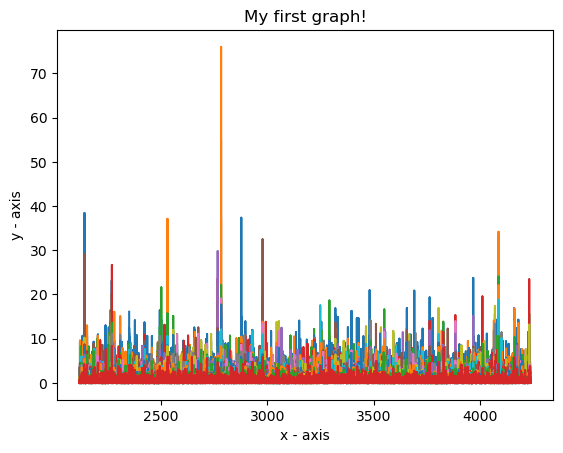

In [13]:
# x axis values
x = x_train_vol['date']
# corresponding y axis values
y = x_train_vol[x_train_vol.columns[~x_train_vol.columns.isin(['date'])]]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

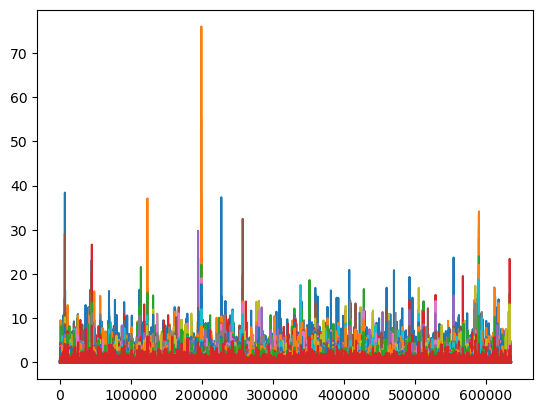

In [15]:
plt.plot(y)
plt.show()

## Supervised model 

